<a href="https://colab.research.google.com/github/KwameNtaadu007/ML/blob/main/ml_assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Download any dataset on house pricing from Kaggle/UCL or any data repository

2. Pre-process the data(missing values, outliers, duplicates etc.)

3. Examine the features

4. Use multiple feature selection techniques to select the relevant features and use it to predict the price of the house.



**Import Libraries**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px


# House Price Prediction: A Comprehensive Analysis

**DATA PREPROCESSING**

We create a function that takes in file path, removes duplicates and fills in missing values with and imputer and returns the data.

---

## **1. Data Overview**

### Dataset Source:

- Kaggle/UCL repository
- File: `NY-House-Dataset.csv`

In [ ]:
def wrangle(filepath):
    """
    Reads a CSV file, cleans it by removing duplicates and imputes missing values.

    Args:
        filepath (str): Path to the CSV file.

    Returns:
        pandas.DataFrame: Cleaned DataFrame.
    """
    # Load the dataset
    df = pd.read_csv(filepath)

    # Check for duplicates
    num_duplicates = df.duplicated().sum()
    if num_duplicates > 0:
        print(f"Removed {num_duplicates} duplicate rows.")
        df = df.drop_duplicates()

    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Missing values found:")
        print(missing_values)

        # Impute missing values for numerical and categorical columns
        imputer = SimpleImputer(strategy="mean")
        df.loc[:, df.select_dtypes(include=np.number).columns] = imputer.fit_transform(
            df.select_dtypes(include=np.number)
        )
        df.fillna("Unknown", inplace=True)  # For categorical columns

    return df





Load the file and examine the file

In [ ]:
# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/NY-House-Dataset.csv"
df = wrangle(file_path)


Removed 214 duplicate rows.


In [ ]:
# Display the first few rows of the dataset
df.head()
#-----------------------------------------------------------------------

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
# Display structure of the data
df.info()
#-----------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4587 non-null   object 
 1   TYPE                         4587 non-null   object 
 2   PRICE                        4587 non-null   int64  
 3   BEDS                         4587 non-null   int64  
 4   BATH                         4587 non-null   float64
 5   PROPERTYSQFT                 4587 non-null   float64
 6   ADDRESS                      4587 non-null   object 
 7   STATE                        4587 non-null   object 
 8   MAIN_ADDRESS                 4587 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   object 
 10  LOCALITY                     4587 non-null   object 
 11  SUBLOCALITY                  4587 non-null   object 
 12  STREET_NAME                  4587 non-null   object 
 13  LONG_NAME              

**STATISTICAL SUMMARY**


## **1. Data Overview**

### Initial Data Exploration:

- **Data Size**: 4587 rows, 17 columns
- **Categorical Variables**: 11
- **Numerical Variables**: 6 (`PRICE`, `BEDS`, `BATH`, `PROPERTYSQFT`, `LATITUDE`, `LONGITUDE`)

### Key Observations:

- Duplicate rows identified and removed: **214 rows**
- Missing values handled using **SimpleImputer** (strategy: mean for numerical data, "Unknown" for categorical data).

---

In [ ]:
# Display basic statistics of the data
df.describe()
#-----------------------------------------------------------------------



,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.587000e+03,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000
mean,2.381172e+06,3.365816,2.377735,2177.712426,40.713932,-73.941584
std,3.206831e+07,2.628808,1.968503,2283.095559,0.087738,0.101276
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.638588,-73.987420
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726667,-73.949116
75%,1.498500e+06,4.000000,3.000000,2184.207862,40.771913,-73.869455
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


Numerical Summary:



*   **PRICE**: Extreme values observed (min: **USD 2,494**, max: **USD 2.1B**), likely indicating outliers.
*   **BEDS** and **BATH**: Unusually high maximum values (50 each) suggest outliers.
*   **PROPERTYSQFT**: Significant variability, with a max of 65,535 likely being an outlier.



## **3. Data Visualization**

### **Outlier Detection**:

1. **Boxplots**:
   - Visualized outliers in `PROPERTYSQFT` and `PRICE`.
2. **Scatter Plot**:
   - Showed the relationship between `PRICE` and `PROPERTYSQFT`.
3. **Histograms**:
   - Highlighted skewed distributions in `BEDS` and `BATH`.
4. **Density Plot**:
   - Observed overall distributions of numerical variables.

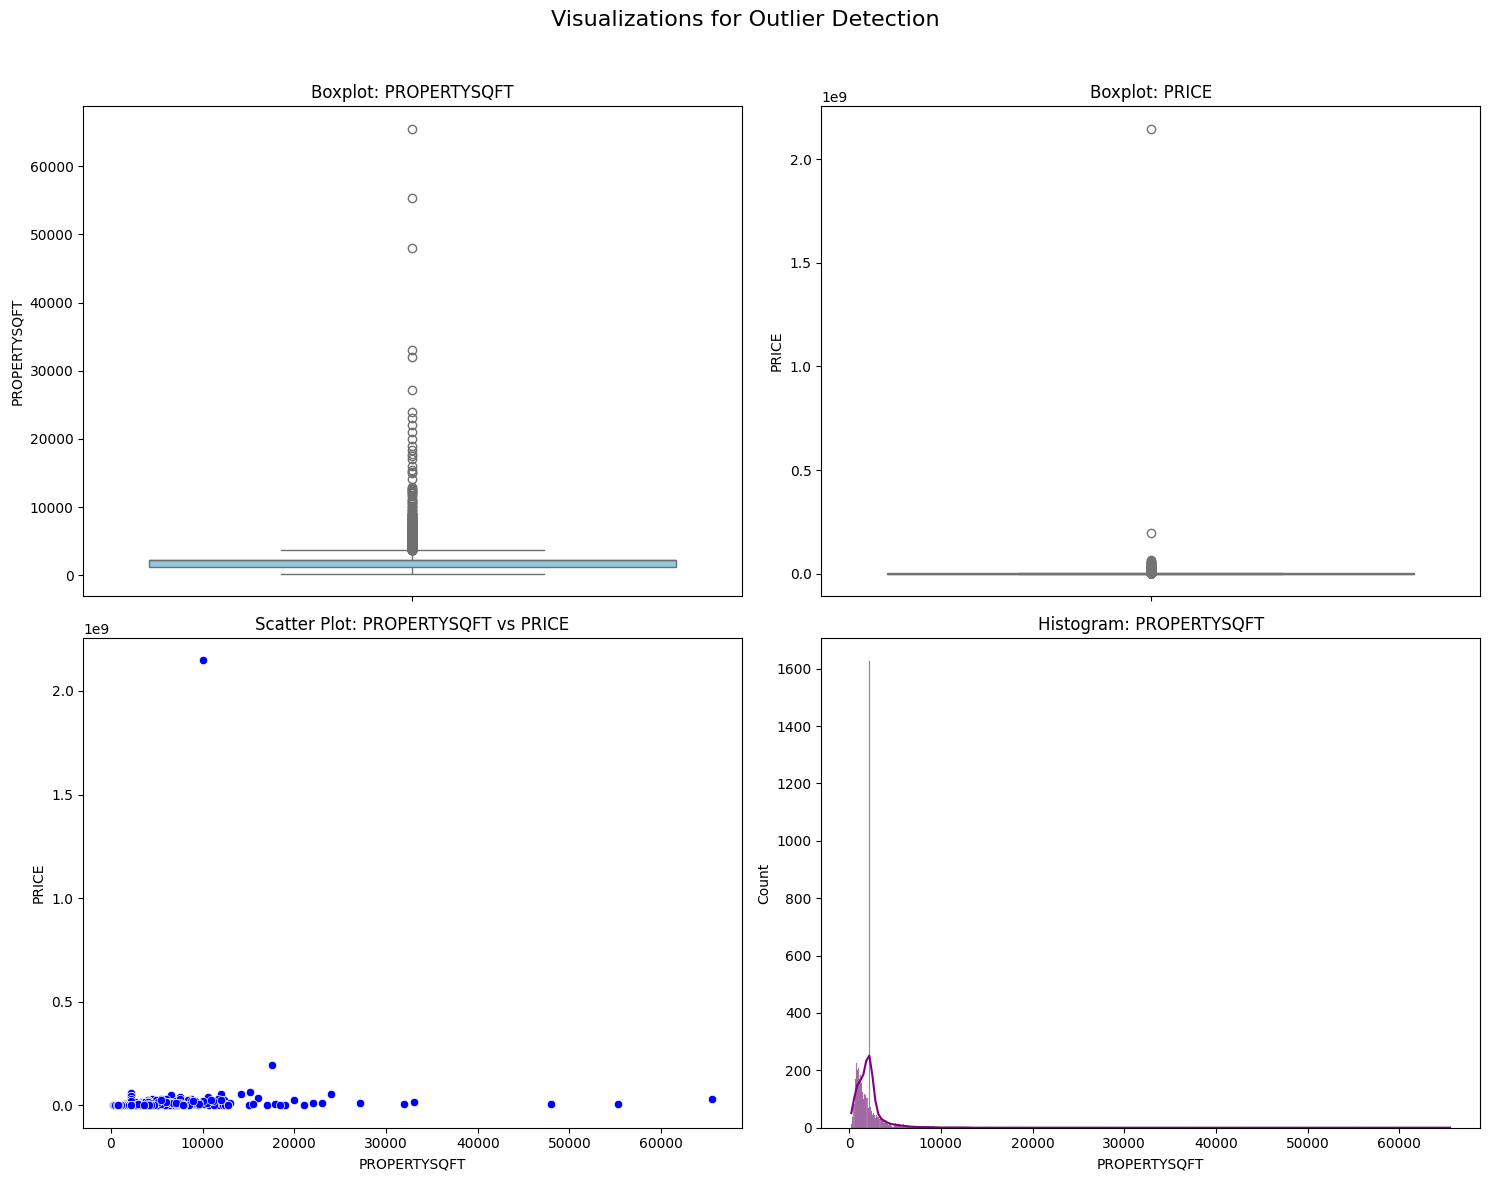

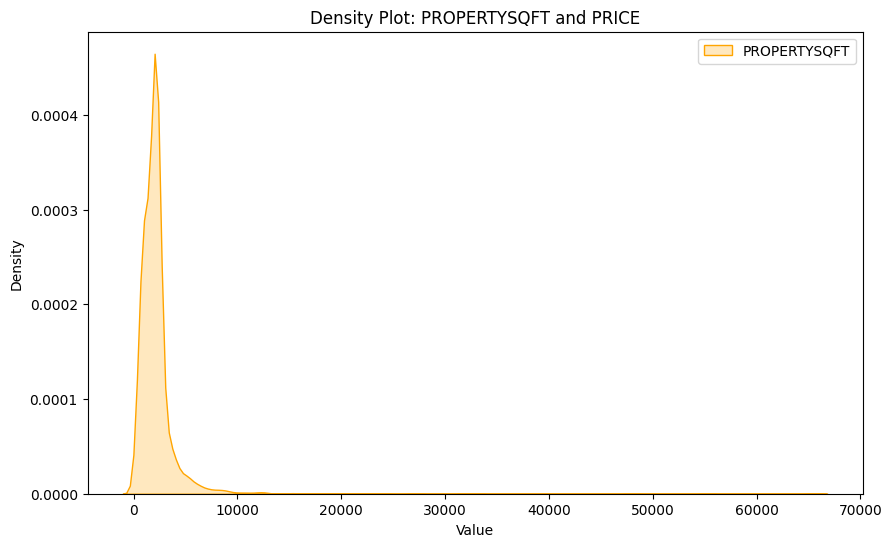

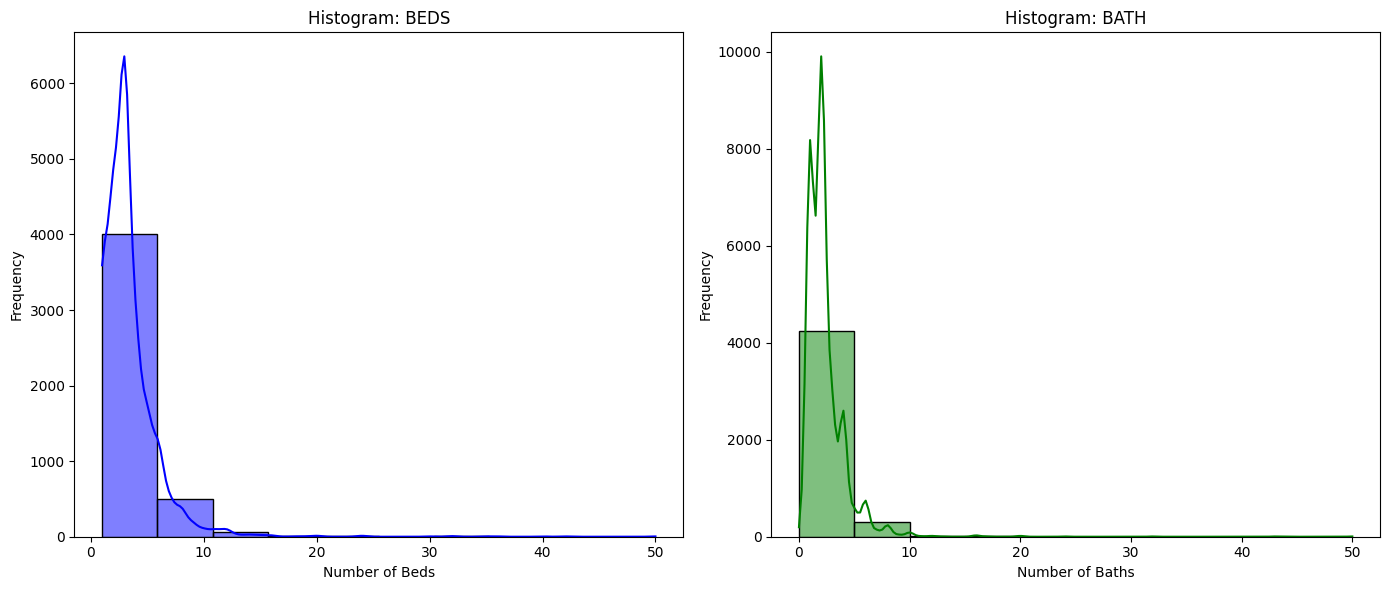

In [ ]:
# Set up the figure layout
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Visualizations for Outlier Detection", fontsize=16)

# 1. Boxplot for PROPERTYSQFT and PRICE
sns.boxplot(data=df, y="PROPERTYSQFT", ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Boxplot: PROPERTYSQFT")
sns.boxplot(data=df, y="PRICE", ax=axes[0, 1], color="lightgreen")
axes[0, 1].set_title("Boxplot: PRICE")

# 2. Scatter Plot for PROPERTYSQFT vs PRICE
sns.scatterplot(data=df, x="PROPERTYSQFT", y="PRICE", ax=axes[1, 0], color="blue")
axes[1, 0].set_title("Scatter Plot: PROPERTYSQFT vs PRICE")
axes[1, 0].set_xlabel("PROPERTYSQFT")
axes[1, 0].set_ylabel("PRICE")

# 3. Histogram for PROPERTYSQFT and PRICE
sns.histplot(df["PROPERTYSQFT"], kde=True, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Histogram: PROPERTYSQFT")
axes[1, 1].set_xlabel("PROPERTYSQFT")

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 4. Density Plot for PROPERTYSQFT and PRICE
plt.figure(figsize=(10, 6))
sns.kdeplot(df["PROPERTYSQFT"], fill=True, color="orange", label="PROPERTYSQFT")
# sns.kdeplot(df["PRICE"], shade=True, color="red", label="PRICE")
plt.title("Density Plot: PROPERTYSQFT and PRICE")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


# Plot histograms for BEDS and BATH
plt.figure(figsize=(14, 6))

# Histogram for BEDS
plt.subplot(1, 2, 1)
sns.histplot(df['BEDS'], kde=True, color='blue', bins=10)
plt.title("Histogram: BEDS")
plt.xlabel("Number of Beds")
plt.ylabel("Frequency")

# Histogram for BATH
plt.subplot(1, 2, 2)
sns.histplot(df['BATH'], kde=True, color='green', bins=10)
plt.title("Histogram: BATH")
plt.xlabel("Number of Baths")
plt.ylabel("Frequency")

# Show the plots
plt.tight_layout()
plt.show()


**Outlier Removal with IQR**


### Method: Interquartile Range (IQR)

- Applied to `PRICE` and `PROPERTYSQFT`.
- Reduced data size to **3931 rows** after removing extreme values.

In [ ]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    """
    Removes outliers from a DataFrame column using the IQR method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The column name to check for outliers.

    Returns:
        pd.DataFrame: DataFrame with outliers removed.
    """
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                   # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR    # Lower bound
    upper_bound = Q3 + 1.5 * IQR    # Upper bound

    # Filter out rows with outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from both PRICE and PROPERTYSQFT
cleaned_data = remove_outliers_iqr(df, 'PRICE')
cleaned_data = remove_outliers_iqr(cleaned_data, 'PROPERTYSQFT')

# Display the cleaned data summary
cleaned_data.describe()


,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,3.931000e+03,3931.000000,3931.000000,3931.000000,3931.000000,3931.000000
mean,8.686314e+05,2.979140,1.998768,1735.593394,40.710832,-73.936175
std,5.870534e+05,1.804454,1.097530,708.338802,0.090251,0.105878
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.252823
25%,4.390000e+05,2.000000,1.000000,1100.000000,40.633071,-73.984490
50%,7.250000e+05,3.000000,2.000000,2024.000000,40.722400,-73.939675
75%,1.149000e+06,4.000000,2.000000,2184.207862,40.770881,-73.858724
max,2.995000e+06,18.000000,12.000000,3800.000000,40.912729,-73.702450


In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3931 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  3931 non-null   object 
 1   TYPE                         3931 non-null   object 
 2   PRICE                        3931 non-null   int64  
 3   BEDS                         3931 non-null   int64  
 4   BATH                         3931 non-null   float64
 5   PROPERTYSQFT                 3931 non-null   float64
 6   ADDRESS                      3931 non-null   object 
 7   STATE                        3931 non-null   object 
 8   MAIN_ADDRESS                 3931 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  3931 non-null   object 
 10  LOCALITY                     3931 non-null   object 
 11  SUBLOCALITY                  3931 non-null   object 
 12  STREET_NAME                  3931 non-null   object 
 13  LONG_NAME              

## **5. Correlation Matrix**

### Key Observations:

- `BATH` and `BEDS`: **Strong correlation** (0.721).
- `PRICE` and `BATH`: **Moderate correlation** (0.537).
- `PRICE` and `PROPERTYSQFT`: **Moderate correlation** (0.377).
- `LATITUDE` and `PRICE`: Negligible correlation (−0.042).

### Implications:

- **Feature Selection**: Prioritize `BATH`, `BEDS`, and `PROPERTYSQFT`.
- **Avoid Multicollinearity**: `BATH` and `BEDS` highly correlated; use with caution.

---

                 PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
PRICE         1.000000  0.393064  0.537261      0.376674 -0.041790  -0.111196
BEDS          0.393064  1.000000  0.721497      0.470323 -0.105135   0.041946
BATH          0.537261  0.721497  1.000000      0.471121 -0.141547  -0.021648
PROPERTYSQFT  0.376674  0.470323  0.471121      1.000000 -0.028417   0.046964
LATITUDE     -0.041790 -0.105135 -0.141547     -0.028417  1.000000   0.534922
LONGITUDE    -0.111196  0.041946 -0.021648      0.046964  0.534922   1.000000


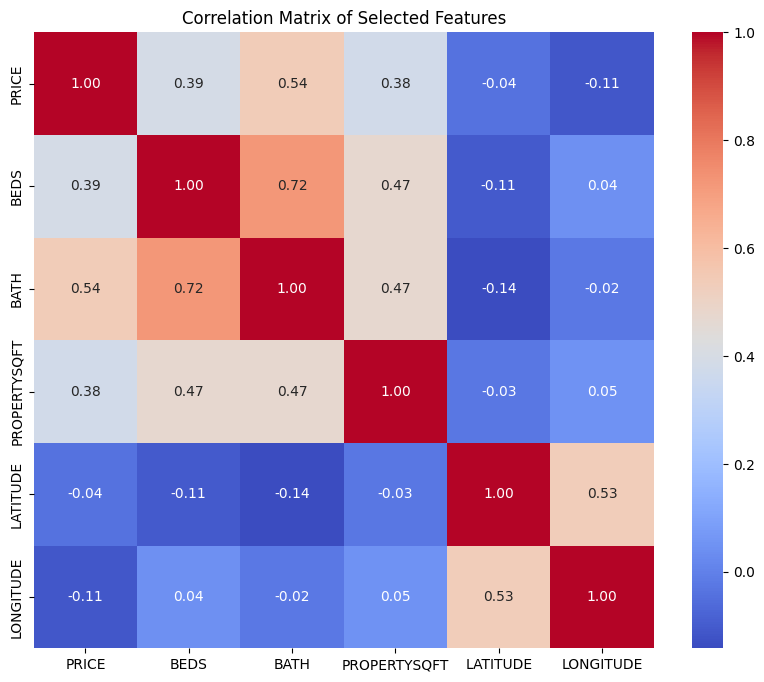

In [ ]:
# Columns of interest
columns_of_interest = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']

# Compute the correlation matrix
correlation_matrix = cleaned_data[columns_of_interest].corr()
print(correlation_matrix)
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Selected Features")
plt.show()

The correlation matrix provides insights into the relationships between the features:

### Key Observations:
1. **Strong Relationships**:
   - `BATH` and `BEDS`: Correlation of **0.721** indicates a strong relationship (as the number of bathrooms increases, so do the number of bedrooms).
   - `PRICE` and `BATH`: Correlation of **0.537**, suggesting that properties with more bathrooms are likely to have higher prices.

2. **Moderate Relationships**:
   - `PRICE` and `BEDS`: Correlation of **0.393**, indicating a moderate positive relationship.
   - `PRICE` and `PROPERTYSQFT`: Correlation of **0.377**, aligning with the general intuition that larger properties tend to cost more.

3. **Weak or Negligible Relationships**:
   - `LATITUDE` and `PRICE`: Correlation of **-0.042**, suggesting little to no relationship.
   - `LONGITUDE` and `PRICE`: Correlation of **-0.111**, indicating a very weak negative relationship.

4. **Interesting Location Patterns**:
   - `LATITUDE` and `LONGITUDE`: Correlation of **0.535**, which reflects geographic clustering within the dataset.

---

### Implications for Modeling:
- **Highly Correlated Predictors**: Avoid using `BATH` and `BEDS` together without addressing multicollinearity.
- **Feature Prioritization**: Focus on `BATH`, `BEDS`, and `PROPERTYSQFT` as primary predictors for `PRICE`.
- **Geographical Impact**: Weak correlations with `LATITUDE` and `LONGITUDE` suggest limited influence of location (as encoded) on price prediction.

Would you like to proceed with feature selection or model training based on these observations?

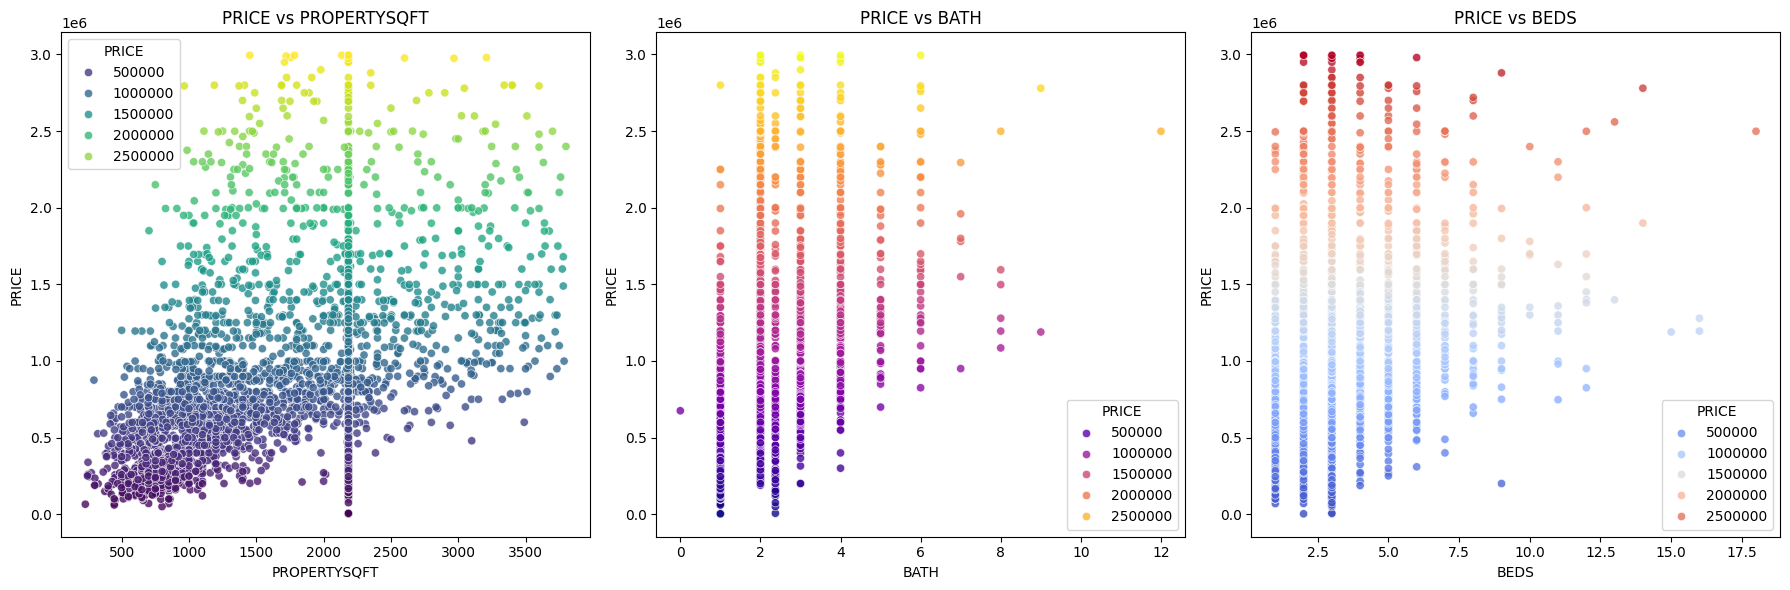

In [ ]:
# Scatter plots for PRICE vs PROPERTYSQFT, BATH, and BEDS
plt.figure(figsize=(18, 6))

# 1. PRICE vs PROPERTYSQFT
plt.subplot(1, 3, 1)
sns.scatterplot(data=cleaned_data, x="PROPERTYSQFT", y="PRICE", hue="PRICE", palette="viridis", alpha=0.8)
plt.title("PRICE vs PROPERTYSQFT")
plt.xlabel("PROPERTYSQFT")
plt.ylabel("PRICE")

# 2. PRICE vs BATH
plt.subplot(1, 3, 2)
sns.scatterplot(data=cleaned_data, x="BATH", y="PRICE", hue="PRICE", palette="plasma", alpha=0.8)
plt.title("PRICE vs BATH")
plt.xlabel("BATH")
plt.ylabel("PRICE")

# 3. PRICE vs BEDS
plt.subplot(1, 3, 3)
sns.scatterplot(data=cleaned_data, x="BEDS", y="PRICE", hue="PRICE", palette="coolwarm", alpha=0.8)
plt.title("PRICE vs BEDS")
plt.xlabel("BEDS")
plt.ylabel("PRICE")

# Adjust layout and display
plt.tight_layout()
plt.show()

**Distribution properties in various locations and their Price**

This Map box scatter plot further emphasizes what is revealed by the correlation matrix about the low effect of location on price. both low and high prices are scatter all over the map



### **Geographical Insights**:

- Mapbox scatter plot revealed minimal influence of location (`LATITUDE`, `LONGITUDE`) on `PRICE`.

---

In [ ]:
fig = px.scatter_mapbox(
    cleaned_data,
    lat="LATITUDE",
    lon="LONGITUDE",
    #center={"LATITUDE": -14.2, "LONGITUDE": -51.9},  # Map will be centered on Brazil
    width=1000,
    height=600,
    color="PRICE",
    hover_data=["PRICE"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

## **6. Data Splitting**

- Features (`X`): `PROPERTYSQFT`, `BEDS`, `BATH`, `LATITUDE`, `LONGITUDE`
- Target (`y`): `PRICE`
- Train-test split: 80% training, 20% testing.
  - Training features: (3144, 5)
  - Testing features: (787, 5)

---

In [ ]:
# Define the features (X) and target (y)
X = cleaned_data[['PROPERTYSQFT', 'BEDS', 'BATH', 'LATITUDE', 'LONGITUDE']]
y = cleaned_data['PRICE']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (3144, 5)
Testing features shape: (787, 5)
Training target shape: (3144,)
Testing target shape: (787,)


#                       **BUILDING THE PRICE PREDICTION MODEL**


## **7. Baseline Model**

It helps us understand how well a simple model performs, giving you a benchmark to compare your machine learning model's performance.

### **Purpose of the Baseline**
- **MSE**: Tells you the error you'd get if you predicted the average price for every property.
- **R² Score**: For the baseline, it will typically be low or negative, as it doesn't explain the variance in the data.


### Method:

- Predict the mean of `y_train` for all test samples.

### Evaluation:

- **MSE**: 371,864,325,317.05273
- **R² Score**: −0.0019

In [ ]:
# Calculate the mean (baseline prediction)
baseline_prediction = np.mean(y_train)

# Generate predictions for the test set
baseline_predictions = np.full(shape=y_test.shape, fill_value=baseline_prediction)

# Evaluate the baseline
baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_r2 = r2_score(y_test, baseline_predictions)

print(f"Baseline Mean Squared Error (MSE): {baseline_mse}")
print(f"Baseline R² Score: {baseline_r2}")

Baseline Mean Squared Error (MSE): 371864325317.05273
Baseline R² Score: -0.001910157592884154



## **8. Linear Regression Model**
Instantiating and Fitting the Model

In [ ]:
# Step 1: Instantiate the model
model = LinearRegression()

# Step 2: Fit the model to the training data
model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Display the results
print(f"Model Mean Squared Error (MSE): {mse}")
print(f"Model R² Score: {r2}")

Model Mean Squared Error (MSE): 253710212179.9413
Model R² Score: 0.3164312321398357


### Analysis of Results:
1. **Model MSE**:
   - **253,710,212,179.9413** is a significant improvement over the baseline MSE (**371,864,325,317.05273**). This suggests that the model captures some relationship between the features and `PRICE`.

2. **Model R² Score**:
   - **0.316** indicates that the model explains ~31.6% of the variance in the `PRICE`. While this is better than the baseline (negative R²), there is room for improvement.



### Model Evaluation:

- **MSE**: 253,710,212,179.9413
- **R² Score**: 0.316

### Analysis:

- Significant improvement over the baseline.
- Captures \~31.6% of the variance in `PRICE`.
- Room for improvement in predictive accuracy.


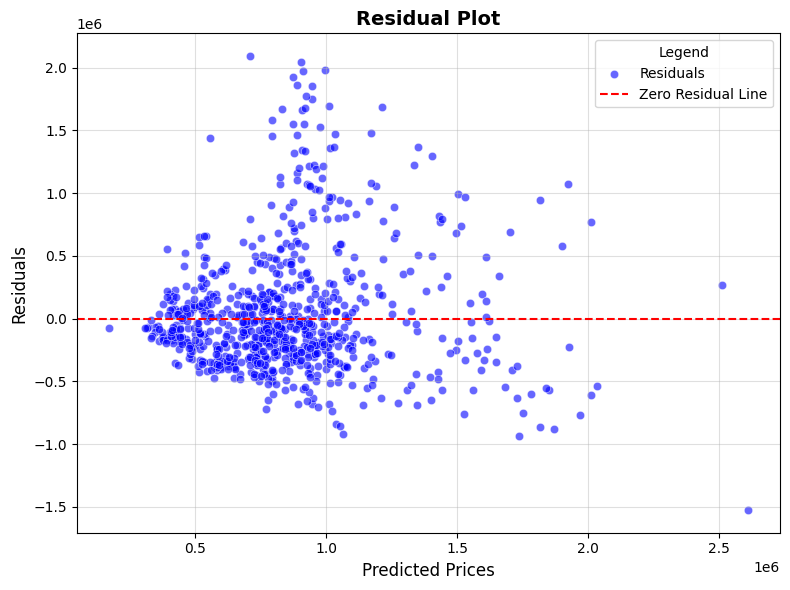

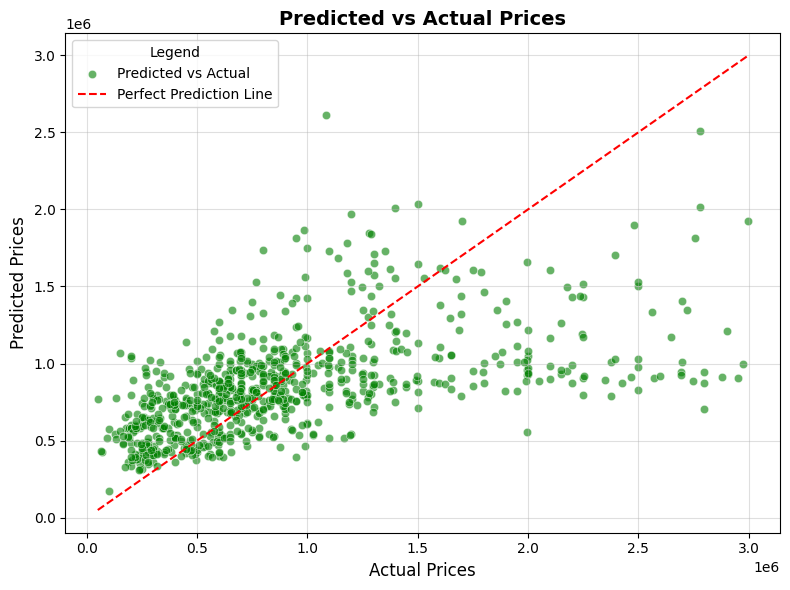

In [ ]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, label="Residuals", color="blue")
plt.axhline(0, color='red', linestyle='--', label="Zero Residual Line")
plt.title("Residual Plot", fontsize=14, weight='bold')
plt.xlabel("Predicted Prices", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.legend(title="Legend", loc="upper right", fontsize=10)  # Adding legend
plt.grid(alpha=0.4)  # Adding subtle gridlines
plt.tight_layout()
plt.show()

# Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label="Predicted vs Actual", color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label="Perfect Prediction Line")
plt.title("Predicted vs Actual Prices", fontsize=14, weight='bold')
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.legend(title="Legend", loc="upper left", fontsize=10)  # Adding legend
plt.grid(alpha=0.4)  # Adding subtle gridlines
plt.tight_layout()
plt.show()


Based on the data a Random Forest is a more suitable choice for this price prediction task.


*   **Non-Linear Relationships:** While a linear relationship between PROPERTYSQFT and PRICE might be a reasonable starting point, it's possible that the actual relationship is more complex. Random Forest can capture these non-linear patterns effectively.
*   **Robustness to Outliers:** Real-estate data often contains outliers, such as luxury properties or properties in unique locations. Random Forest is less sensitive to these outliers, making it a more reliable choice.
Feature Importance: Random Forest can provide feature importance scores, helping us understand which features contribute most to the price prediction.




**RANDOM FOREST MODEL IMPLEMENTATION**

In [ ]:
# Step 1: Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Step 2: Fit the model to the training data
rf_model.fit(X_train, y_train)

# Step 3: Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Step 4: Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")

# Step 5 (Optional): Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Step 6: Retrain with best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest Mean Squared Error (MSE): {mse_best_rf}")
print(f"Tuned Random Forest R² Score: {r2_best_rf}")


Random Forest Mean Squared Error (MSE): 113065213292.56038
Random Forest R² Score: 0.6953695798282389
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Mean Squared Error (MSE): 113005788360.16379
Tuned Random Forest R² Score: 0.6955296878013059


To visualize the results of the Random Forest model, you can create the following plots:

---

### **1. Feature Importance Plot**
- **Purpose**: Highlight the most influential features in the Random Forest model.
- **Chart**: Bar plot of feature importance scores.










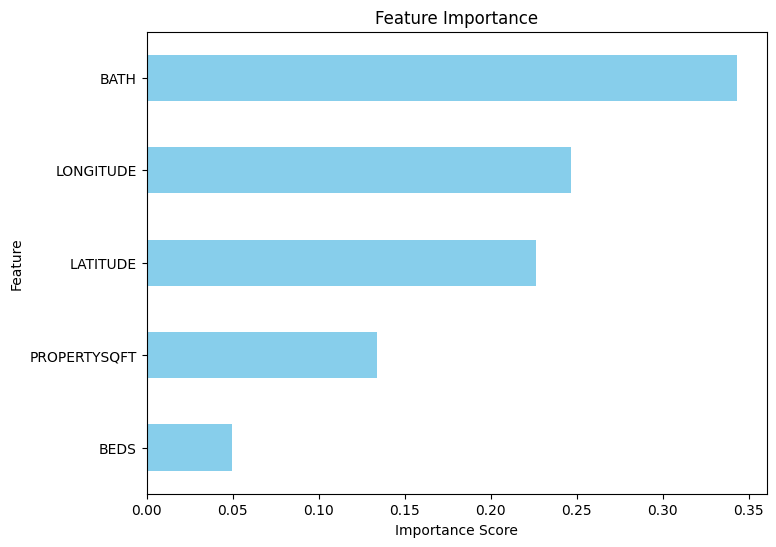

In [ ]:
# Get feature importance from the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plot feature importances
plt.figure(figsize=(8, 6))
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### **2. Residual Plot**
- **Purpose**: Examine the difference between actual and predicted values.
- **Chart**: Scatter plot of residuals.

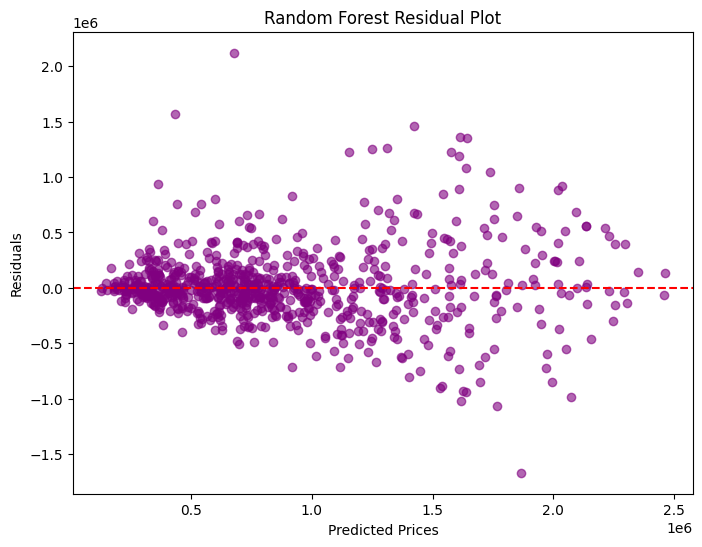

In [ ]:
# Residual plot
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Random Forest Residual Plot")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()

### **3. Predicted vs. Actual Plot**
- **Purpose**: Compare predicted values against actual values to evaluate model accuracy.
- **Chart**: Scatter plot with a reference diagonal line.

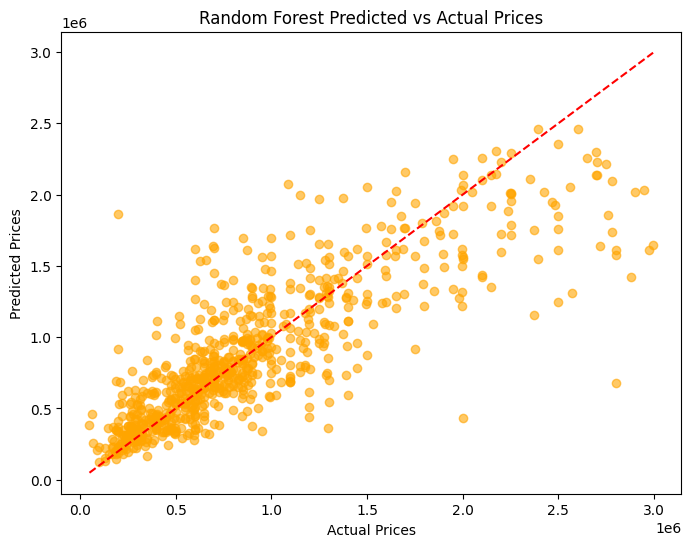

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Random Forest Predicted vs Actual Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


### **4. Model Comparison Bar Chart**
- **Purpose**: Compare baseline, linear regression, and random forest model performance metrics.
- **Chart**: Bar plot of MSE and R² scores.


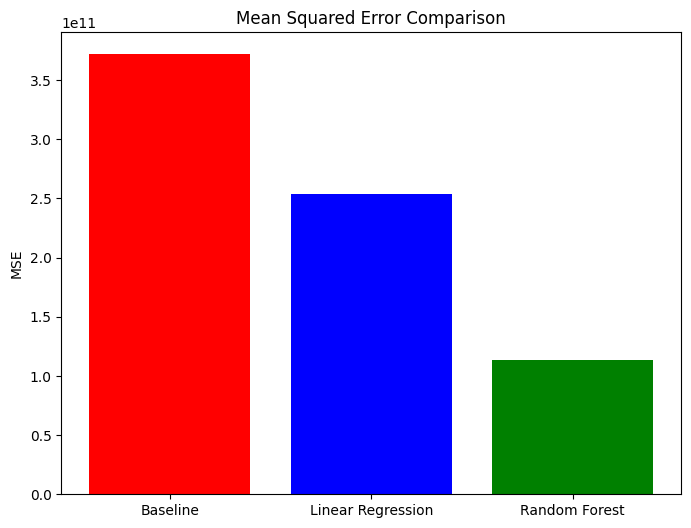

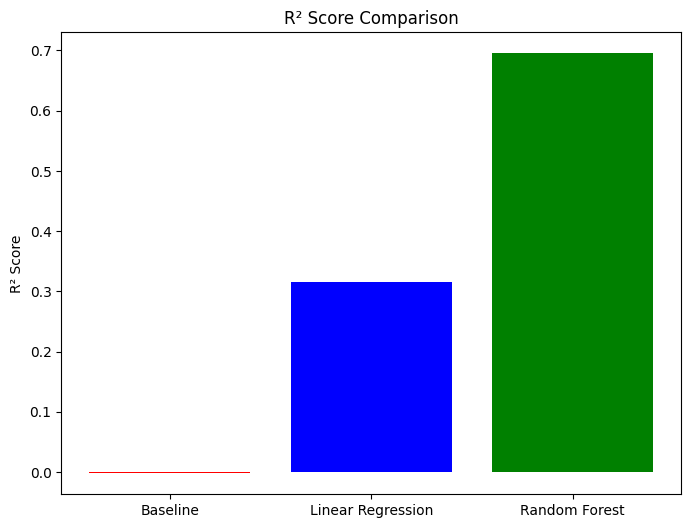

In [ ]:
# Model comparison plot
import numpy as np

models = ['Baseline', 'Linear Regression', 'Random Forest']
mse_scores = [371864325317.05273, 253710212179.9413, mse_rf]
r2_scores = [-0.0019, 0.316, r2_rf]

# MSE comparison
plt.figure(figsize=(8, 6))
plt.bar(models, mse_scores, color=['red', 'blue', 'green'])
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE')
plt.show()

# R² comparison
plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color=['red', 'blue', 'green'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.show()

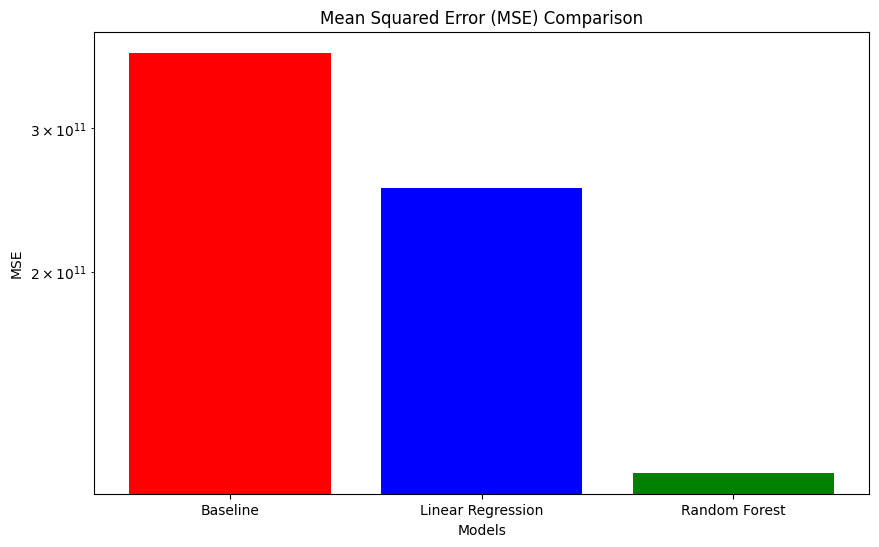

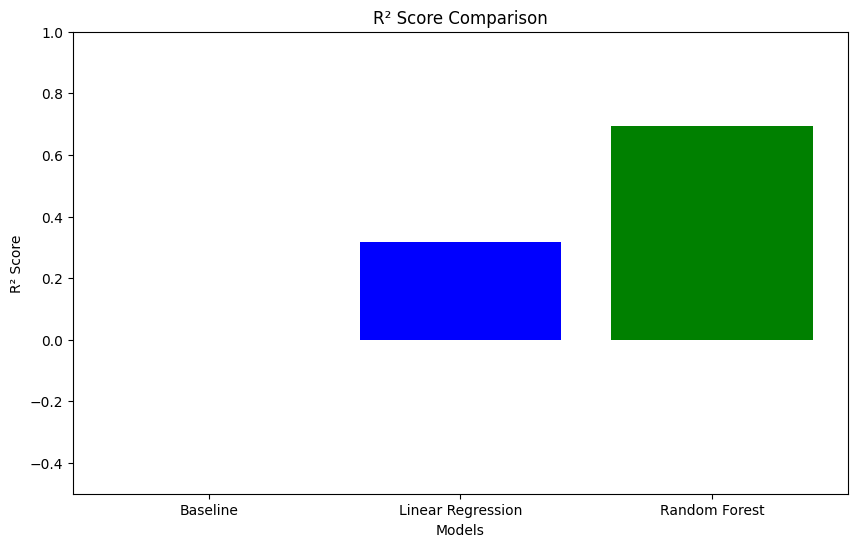

In [ ]:
# Data for performance comparison
models = ['Baseline', 'Linear Regression', 'Random Forest']
mse_scores = [371864325317.05273, 253710212179.9413, 113065213292.56038]
r2_scores = [-0.0019, 0.316, 0.695]

# Plot Mean Squared Error (MSE) comparison
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color=['red', 'blue', 'green'])
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')
plt.xlabel('Models')
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.show()

# Plot R² Score comparison
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['red', 'blue', 'green'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.ylim(-0.5, 1)  # Set limits for better comparison
plt.show()


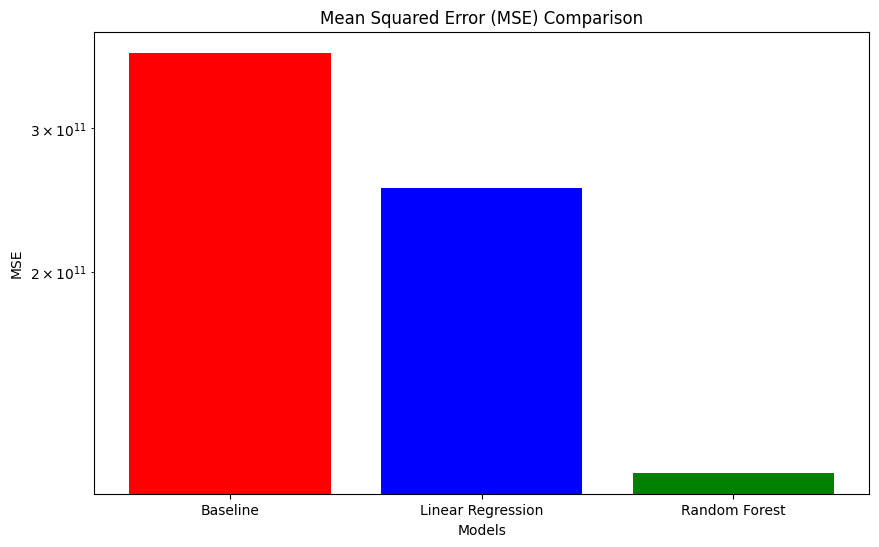

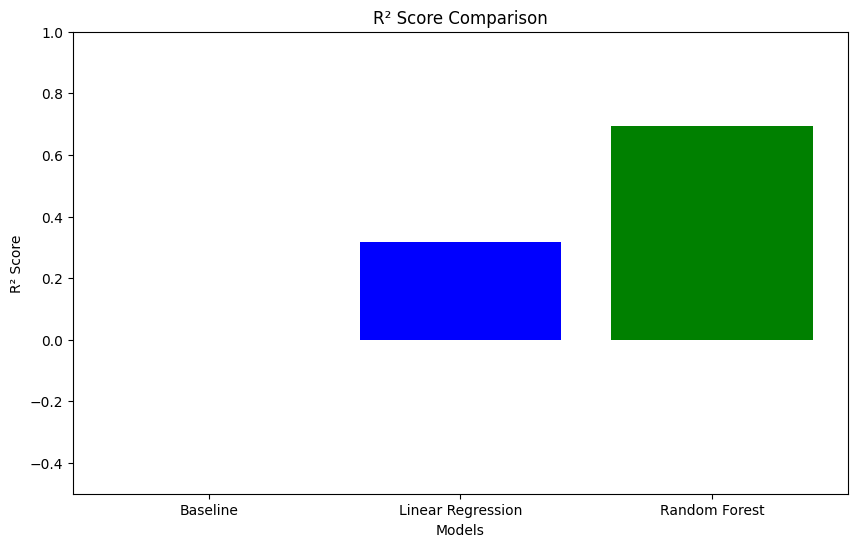

In [ ]:

# Data for performance comparison
models = ['Baseline', 'Linear Regression', 'Random Forest']
mse_scores = [371864325317.05273, 253710212179.9413, 113065213292.56038]
r2_scores = [-0.0019, 0.316, 0.695]

# Plot Mean Squared Error (MSE) comparison
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color=['red', 'blue', 'green'])
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')
plt.xlabel('Models')
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.show()

# Plot R² Score comparison
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['red', 'blue', 'green'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.ylim(-0.5, 1)  # Set limits for better comparison
plt.show()


## Interpreting the Results

### Baseline Model
* **Mean Squared Error (MSE): 371864325317.05273:** This indicates a high level of error in the baseline model. It means, on average, the squared difference between the predicted and actual prices is quite large.
* **R² Score: -0.001910157592884154:** A negative R² score is unusual. It suggests that the baseline model performs worse than a simple horizontal line model. This is likely due to the high variance in the data.

### Random Forest Model
* **Mean Squared Error (MSE): 113065213292.56038:** This is a significant improvement over the baseline. The model is making predictions that are closer to the actual prices.
* **R² Score: 0.6953695798282389:** This means that the model explains approximately 69.5% of the variance in the price. This is a good performance, indicating that the model is capturing the underlying patterns in the data.

### Tuned Random Forest Model
* **Mean Squared Error (MSE): 113005788360.16379:** A slight improvement over the default Random Forest model.
* **R² Score: 0.6955296878013059:** A very slight increase in the R² score, suggesting a marginal improvement in the model's predictive power.

**Overall Interpretation:**

The Random Forest model, especially after hyperparameter tuning, significantly outperforms the baseline model. It is able to capture complex relationships between features and the target variable. However, there is still room for improvement. Consider exploring additional features, refining feature engineering techniques, or trying more advanced models like Gradient Boosting Machines or Neural Networks.

**Potential Improvements:**

* **Feature Engineering:** Create new features that might be relevant, such as property age, neighborhood quality, or distance to amenities.
* **Data Cleaning:** Ensure that the data is clean and free of errors.
* **Outlier Detection and Handling:** Identify and handle outliers appropriately.
* **Hyperparameter Tuning:** Experiment with different hyperparameters for the Random Forest model to optimize its performance.
* **Ensemble Methods:** Combine multiple models (e.g., Random Forest, Gradient Boosting, Neural Networks) to improve overall performance.

By addressing these factors, we can further enhance the accuracy and reliability of your price prediction model.




---

## **9. Next Steps for Improvement**

1. **Feature Engineering**:
   - Add interactions or transformations (e.g., polynomial features).
2. **Advanced Models**:
   - Explore Random Forest or Gradient Boosting for better performance.
3. **Hyperparameter Tuning**:
   - Optimize model parameters using GridSearchCV.
4. **Residual Analysis**:
   - Examine systematic patterns or biases in predictions.

---

## **10. Conclusion**

- The linear regression model provides a baseline for house price prediction.
- The current approach highlights key data relationships and lays the groundwork for advanced modeling.

**Presentation Prepared By:** [Your Name/Team]





